In [35]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



### 👀 Load dataset


In [36]:
df=pd.read_csv('clean_SMALL.csv')
print(df.shape)
df.head()

(1050, 8)


,area,room,toilet,lat,long,quan,loai_bds,price-VND
0,120,4,6,16.03346,108.23031,quan-hai-chau,mua-nha-biet-thu-lien-ke/,100000
1,120,4,5,16.07079,108.22511,quan-hai-chau,mua-nha-mat-tien-pho/,100000
2,100,4,4,16.09227,108.23095,quan-son-tra,mua-nha-mat-tien-pho/,687000
3,95,3,4,16.02611,108.24381,quan-ngu-hanh-son,mua-nha-mat-tien-pho/,1000000
4,800,4,6,16.02983,108.25417,quan-ngu-hanh-son,mua-nha-biet-thu-lien-ke/,1000000


### 🎨 Convert categorical features to numeric type


#### check categorical feature

In [37]:
unique_quan = df['quan'].unique()
print(unique_quan)
unique_loai_bds = df['loai_bds'].unique()
print(unique_loai_bds)

['quan-hai-chau' 'quan-son-tra' 'quan-ngu-hanh-son' 'huyen-hoa-vang'
 'quan-thanh-khe' 'quan-lien-chieu' 'quan-cam-le']
['mua-nha-biet-thu-lien-ke/' 'mua-nha-mat-tien-pho/' 'mua-nha-hem-ngo/'
 'mua-dat-tho-cu/' 'mua-can-ho-chung-cu/'
 'mua-mat-bang-cua-hang-shop-cafe-do-uong/' 'mua-can-ho-dich-vu/'
 'mua-dat-nen-du-an/' 'mua-dat-kho-xuong/' 'mua-duong-noi-bo/' 'mua-dat/'
 'mua-can-ho-tap-the-cu-xa/' 'mua-can-ho-penthouse/'
 'mua-dat-nong-nghiep/' 'mua-mat-bang-cua-hang-shop-nhieu-muc-dich/']


#### convert

In [38]:
df['quan-code'] = pd.Categorical(df['quan'])
print(df['quan-code'].cat.categories)
df['quan-code'] = df['quan-code'].cat.codes
df['loai_bds-code'] = pd.Categorical(df['loai_bds'])
print(df['loai_bds-code'].cat.categories)
df['loai_bds-code'] = df['loai_bds-code'].cat.codes
df.drop(['loai_bds', 'quan'], axis=1, inplace=True)

Index(['huyen-hoa-vang', 'quan-cam-le', 'quan-hai-chau', 'quan-lien-chieu',
       'quan-ngu-hanh-son', 'quan-son-tra', 'quan-thanh-khe'],
      dtype='object')
Index(['mua-can-ho-chung-cu/', 'mua-can-ho-dich-vu/', 'mua-can-ho-penthouse/',
       'mua-can-ho-tap-the-cu-xa/', 'mua-dat-kho-xuong/', 'mua-dat-nen-du-an/',
       'mua-dat-nong-nghiep/', 'mua-dat-tho-cu/', 'mua-dat/',
       'mua-duong-noi-bo/', 'mua-mat-bang-cua-hang-shop-cafe-do-uong/',
       'mua-mat-bang-cua-hang-shop-nhieu-muc-dich/',
       'mua-nha-biet-thu-lien-ke/', 'mua-nha-hem-ngo/',
       'mua-nha-mat-tien-pho/'],
      dtype='object')


#### create feature price-per-m2 to handle outlier

In [39]:
df['price-per-m2'] = df['price-VND']/df['area']
df['price-per-m2'] = df['price-per-m2'].astype(np.int64)


In [40]:
print(df.shape)
df.describe()

(1050, 9)


,area,room,toilet,lat,long,price-VND,quan-code,loai_bds-code,price-per-m2
count,1.050000e+03,1050.000000,1050.000000,1050.000000,1050.000000,1.050000e+03,1050.000000,1050.000000,1.050000e+03
mean,1.061185e+04,3.547619,3.381905,16.072791,108.044525,1.365318e+10,3.461905,10.893333,1.312318e+08
std,3.394633e+05,6.840559,6.849315,0.705360,5.717104,1.132693e+11,1.616460,4.426505,1.790562e+09
min,2.200000e+01,0.000000,0.000000,15.964680,-77.031960,1.000000e+05,0.000000,0.000000,5.900000e+02
25%,7.200000e+01,0.000000,0.000000,16.033460,108.210887,3.600000e+09,2.000000,7.000000,4.247572e+07
50%,9.300000e+01,3.000000,2.000000,16.054360,108.223555,5.500000e+09,4.000000,13.000000,6.272727e+07
75%,1.250000e+02,4.000000,4.000000,16.070408,108.242170,1.100000e+10,5.000000,14.000000,9.090909e+07
max,1.100000e+07,100.000000,100.000000,38.890370,108.296600,3.600000e+12,6.000000,14.000000,5.806452e+10


### ✂️ Split Train-Test dataset

In [41]:

from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(df, test_size=0.25, random_state=1)
print(data_train.isna().sum())

area             0
room             0
toilet           0
lat              0
long             0
price-VND        0
quan-code        0
loai_bds-code    0
price-per-m2     0
dtype: int64


### 🔍 Check out data distribution of data_train

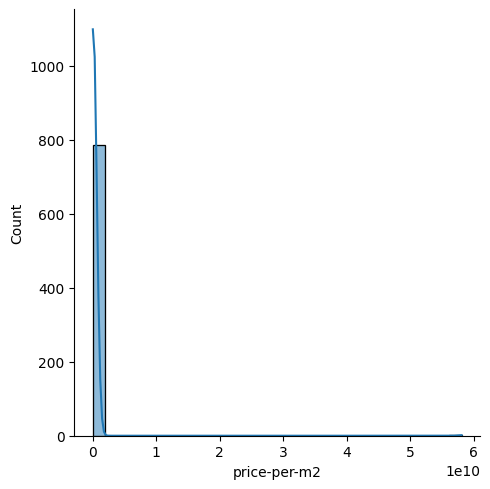

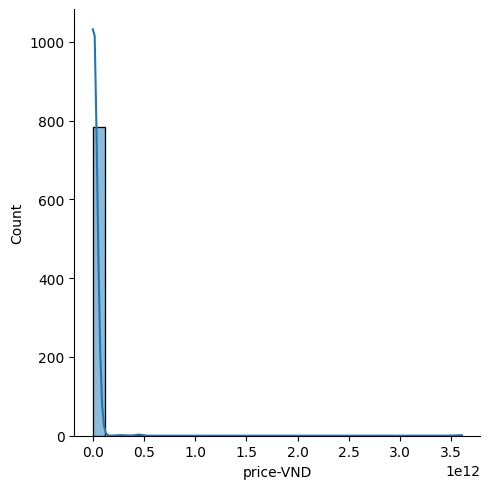

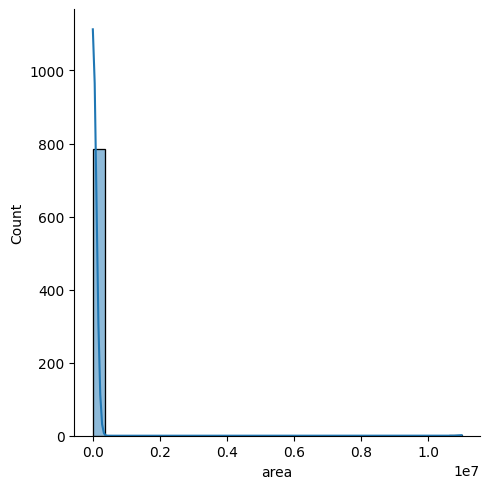

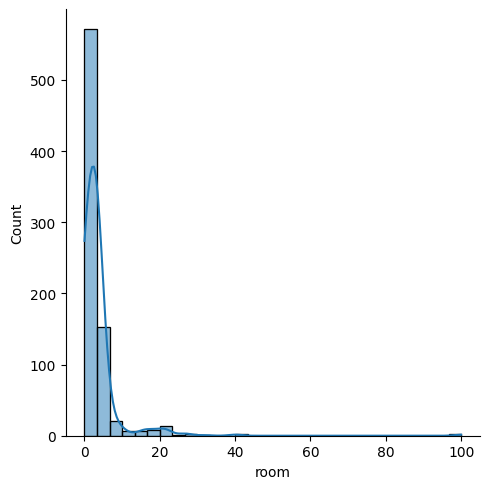

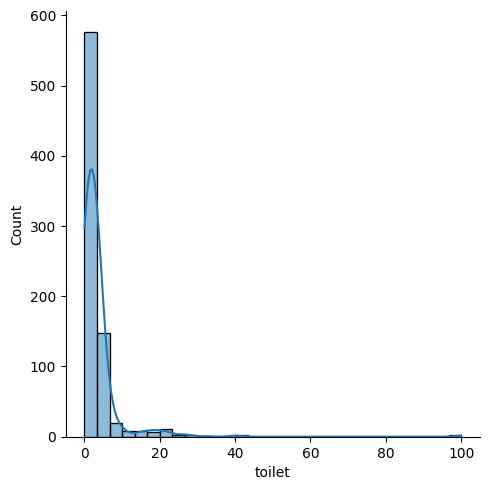

In [42]:
columns = ['price-per-m2','price-VND', 'area', 'room', 'toilet']
for col in columns:
    sns.displot(data_train[col],kde=True,bins=30)
    plt.show()

All features have **skewed** distribution, use **IQR** to find the upper and lower bounds

### 🧹 Outlier processing using IQR

In [43]:
import numpy as np

def outliers_iqr_Train(column):
  q1, q3 = np.percentile(data_train[column], [25, 75])
  iqr = q3 - q1
  lower_bridge = q1 - (iqr * 1.5)
  upper_bridge = q3 + (iqr * 1.5)
  df = data_train[data_train[column] >= lower_bridge]
  df = df[df[column] <= upper_bridge]
  return df

def outliers_iqr_Test(column):
  q1, q3 = np.percentile(data_test[column], [25, 75])
  iqr = q3 - q1
  lower_bridge = q1 - (iqr * 1.5)
  upper_bridge = q3 + (iqr * 1.5)
  df = data_test[data_test[column] >= lower_bridge]
  df = df[df[column] <= upper_bridge]
  return df

columns = ['price-per-m2', 'area', 'room', 'toilet']
for col in columns:
    data_train = outliers_iqr_Train(col)
    data_test = outliers_iqr_Test(col)



### 🔍 Check out data distribution of data_train again

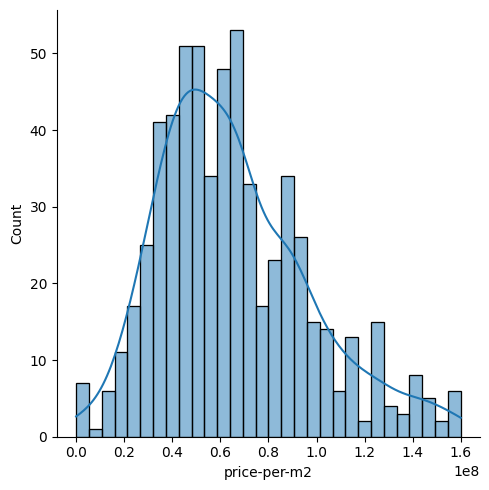

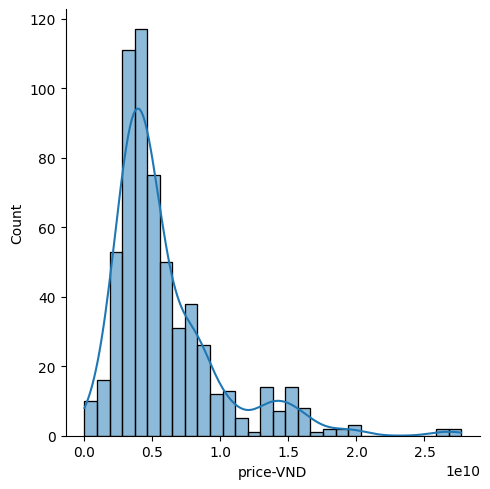

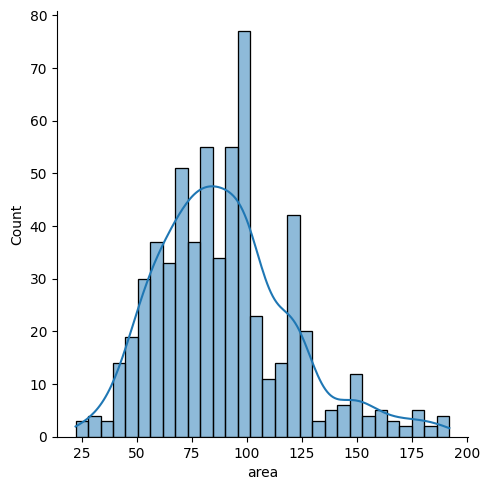

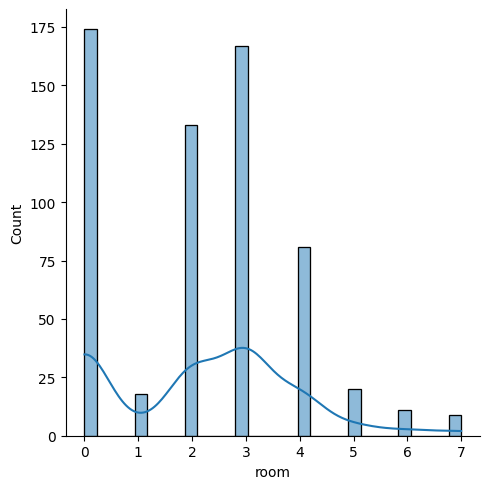

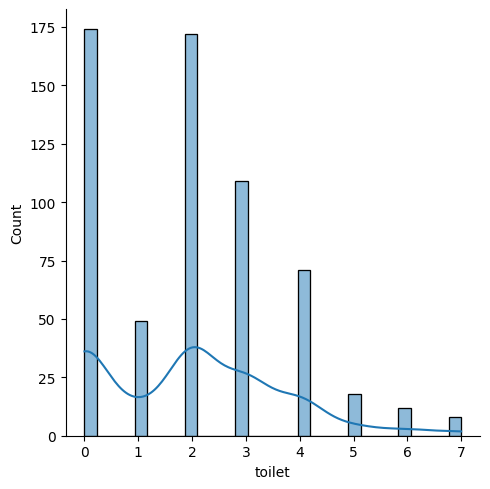

In [44]:
columns = ['price-per-m2','price-VND', 'area', 'room', 'toilet']
for col in columns:
    sns.displot(data_train[col],kde=True,bins=30)
    plt.show()




In [45]:
print(data_train.shape)
print(data_test.shape)
print(data_train.isna().sum())
print(data_test.isna().sum())

(613, 9)
(207, 9)
area             0
room             0
toilet           0
lat              0
long             0
price-VND        0
quan-code        0
loai_bds-code    0
price-per-m2     0
dtype: int64
area             0
room             0
toilet           0
lat              0
long             0
price-VND        0
quan-code        0
loai_bds-code    0
price-per-m2     0
dtype: int64


### 🔨 Normalize the data with z-score
🔖 Rescale the data so that this feature values are centered around 0


In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

columns = ['area', 'room', 'toilet','lat','long']

data_train[columns] = scaler.fit_transform(data_train[columns])
data_test[columns] = scaler.transform(data_test[columns])

### Feature selection


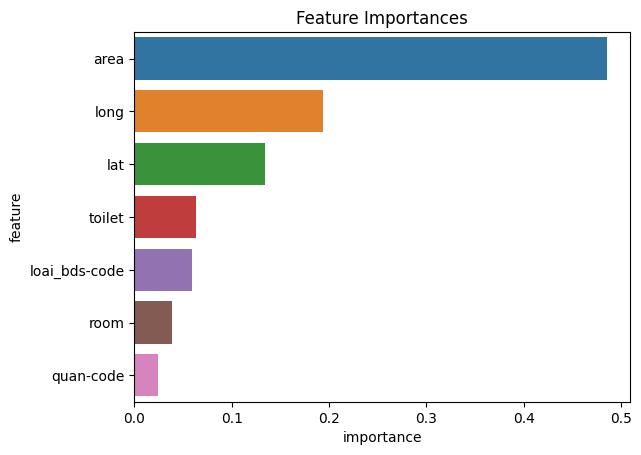

In [47]:
data_train.drop(['price-per-m2'], axis=1, inplace=True)
data_test.drop(['price-per-m2'], axis=1, inplace=True)
from sklearn.ensemble import RandomForestRegressor
x = data_train.drop('price-VND', axis=1)
y = data_train['price-VND'].astype(np.int64)

# Fit RandomForest model
rf = RandomForestRegressor()
rf.fit(x, y)

# lấy đặc trưng quan trọng
importances = pd.DataFrame({'feature': x.columns, 'importance': rf.feature_importances_})
importances = importances.sort_values('importance', ascending=False)

# Plot
sns.barplot(x='importance', y='feature', data=importances)
plt.title('Feature Importances')
plt.show()

#### remove the least importance feature

In [48]:
data_train_save = data_train.drop(['quan-code'], axis=1)
data_test_save = data_test.drop(['quan-code'], axis=1)

In [49]:
print(data_train_save.shape)
print(data_test_save.shape)

(613, 7)
(207, 7)


### 📝 Export data to csv

In [50]:
data_train_save.to_csv('train_data_SMALL.csv', index=False)
data_test_save.to_csv('test_data_SMALL.csv', index=False)
df.to_csv('data_SMALL.csv', index=False)

In [51]:
print(data_train_save.describe())
print(data_test_save.describe())

               area          room        toilet           lat          long  \
count  6.130000e+02  6.130000e+02  6.130000e+02  6.130000e+02  6.130000e+02   
mean  -1.738685e-16 -1.086678e-16  5.360946e-17  5.174617e-14 -7.279006e-13   
std    1.000817e+00  1.000817e+00  1.000817e+00  1.000817e+00  1.000817e+00   
min   -2.224705e+00 -1.286138e+00 -1.199897e+00 -3.263842e+00 -4.728056e+00   
25%   -6.788826e-01 -1.286138e+00 -1.199897e+00 -6.426935e-01 -3.077424e-01   
50%   -1.197555e-01 -1.076588e-01  3.927651e-03  1.021667e-01  7.935028e-02   
75%    5.051513e-01  4.815807e-01  6.058402e-01  6.840654e-01  7.632505e-01   
max    3.366567e+00  2.838539e+00  3.013490e+00  2.361303e+00  2.833228e+00   

          price-VND  loai_bds-code  
count  6.130000e+02     613.000000  
mean   5.895503e+09      10.554649  
std    4.044438e+09       4.671464  
min    1.000000e+05       0.000000  
25%    3.500000e+09       7.000000  
50%    4.600000e+09      13.000000  
75%    7.200000e+09      14.0